In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ROOT_DIR = "/nfs/turbo/umms-indikar/shared/projects/live_cell_imaging/2021-05-12-BJ-PF-H2B-4OHT-AfterSort/test/scene_test/"


data = {}

for f in os.listdir(ROOT_DIR):
    fpath = f"{ROOT_DIR}{f}"
    data_name = f.replace(".csv", "")
    data[data_name] = pd.read_csv(fpath)
    
print(data.keys())

dict_keys(['All Spots statistics', 'Links in tracks statistics', 'Track statistics', 'Spots in tracks statistics'])


In [3]:
for k, v in data.items():
    print(k, v.shape)

All Spots statistics (494833, 31)
Links in tracks statistics (445654, 16)
Track statistics (27648, 45)
Spots in tracks statistics (473302, 31)


In [5]:
df = data['All Spots statistics']
track_stats = data['Track statistics']

# drop tracks without an ID
print(df.shape)
df = df[df['TRACK_ID'] != "None"]
print(df.shape)

# set types
df = df.astype({"TRACK_ID": int})
track_stats = track_stats.astype({"TRACK_ID": int})

# merge
df = pd.merge(df, track_stats, how='left', on=['TRACK_ID'])
print(df.shape)
df.head()

(494833, 31)
(473302, 31)
(473302, 75)


,Label_x,ID,TRACK_ID,QUALITY,POSITION_X,POSITION_Y,POSITION_Z,POSITION_T,FRAME,RADIUS,...,TRACK_MEAN_SPEED,TRACK_MAX_SPEED,TRACK_MIN_SPEED,TRACK_MEDIAN_SPEED,TRACK_STD_SPEED,TRACK_MEAN_QUALITY,TRACK_MAX_QUALITY,TRACK_MIN_QUALITY,TRACK_MEDIAN_QUALITY,TRACK_STD_QUALITY
0,ID40960,40960,0,0.015,3174.383,2165.295,0,0,0,6.5,...,4.958,8.965,0.366,4.305,2.752,0.012,0.016,0.006,0.012,0.003000
1,ID40962,40962,1,0.019,3629.510,2164.787,0,0,0,6.5,...,1.757,6.155,0.334,1.281,1.397,0.019,0.023,0.015,0.020,0.002000
2,ID40963,40963,2,0.045,1350.606,2165.194,0,0,0,6.5,...,2.819,11.668,0.027,2.022,2.469,0.036,0.046,0.015,0.037,0.008000
3,ID40965,40965,3,0.006,3569.586,2165.670,0,0,0,6.5,...,1.900,5.982,0.269,1.629,1.307,0.007,0.008,0.005,0.007,0.000944
4,ID40967,40967,4,0.028,11.054,2168.498,0,0,0,6.5,...,3.274,9.652,0.607,2.179,2.790,0.013,0.032,0.004,0.008,0.010000


Text(0, 0.5, 'Count')

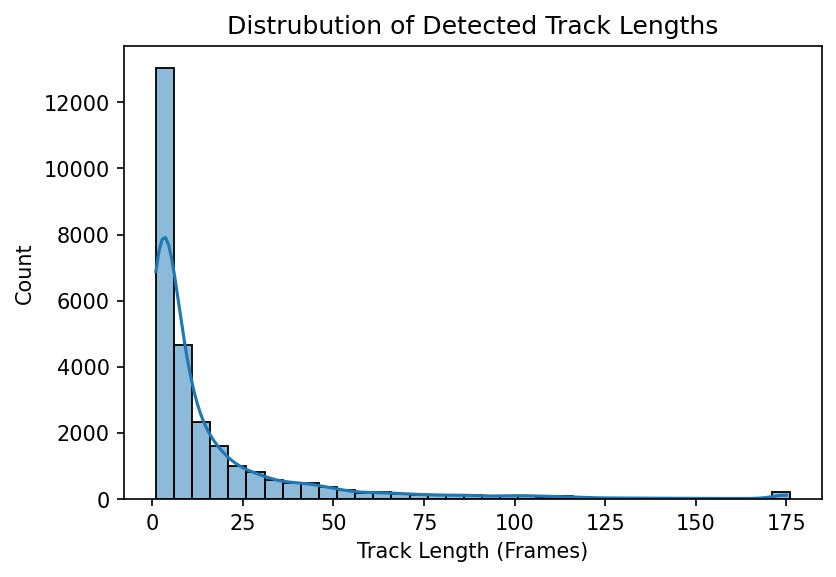

In [6]:



track_lengths = df[['TRACK_ID', 'TRACK_DURATION']].drop_duplicates()

matplotlib.rcParams['figure.dpi'] = 150
sns.histplot(data=track_lengths,
             x='TRACK_DURATION',
             binwidth=5,
             kde=True)

plt.title('Distrubution of Detected Track Lengths')
plt.xlabel('Track Length (Frames)')
plt.ylabel('Count')

track_lengths = df[['TRACK_ID', 'TOTAL_DISTANCE_TRAVELED']].drop_duplicates()

matplotlib.rcParams['figure.dpi'] = 150
sns.histplot(data=track_lengths,
             x='TOTAL_DISTANCE_TRAVELED',
             binwidth=5,
             kde=True,
             color='C1')

plt.title('Distrubution of Detected Track Distance')
plt.xlabel('Track Distance')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

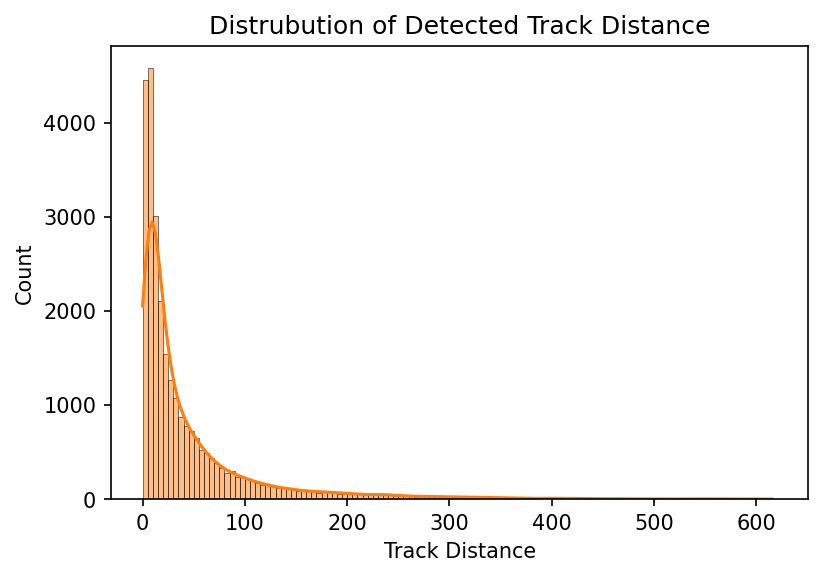

In [7]:
track_lengths = df[['TRACK_ID', 'TOTAL_DISTANCE_TRAVELED']].drop_duplicates()

matplotlib.rcParams['figure.dpi'] = 150
sns.histplot(data=track_lengths,
             x='TOTAL_DISTANCE_TRAVELED',
             binwidth=5,
             kde=True,
             color='C1')

plt.title('Distrubution of Detected Track Distance')
plt.xlabel('Track Distance')
plt.ylabel('Count')

In [10]:
# 24 hour tracks

lt = df[df['TRACK_DURATION'] >= 56]
lt = lt.sort_values(by=['TRACK_ID', 'FRAME'])


lt.loc[:, 'STEP'] = df.groupby(['TRACK_ID']).cumcount() + 1

lt['NORMED_STEP'] = lt['STEP'] / lt['TRACK_DURATION']


def min_max_norm(dataframe, column,  group_by):
    grouper = dataframe.groupby(group_by)[column]                                                                             
    maxes = grouper.transform('max')                                                                                   
    mins = grouper.transform('min')
    
    dataframe[column] = ((dataframe[column] - mins)/(maxes - mins))
    return dataframe


lt = min_max_norm(lt, 'MEAN_INTENSITY01', 'TRACK_ID')
lt = min_max_norm(lt, 'MEAN_INTENSITY02', 'TRACK_ID')
lt = min_max_norm(lt, 'MEAN_INTENSITY03', 'TRACK_ID')

/home/cstansbu/.local/lib/python3.8/site-packages/seaborn/relational.py:514: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/home/cstansbu/.local/lib/python3.8/site-packages/seaborn/relational.py:529: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)
/home/cstansbu/.local/lib/python3.8/site-packages/seaborn/relational.py:514: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/home/cstansbu/.local/lib/python3.8/site-packages/seaborn/relational.py:529: Matplot

Text(0, 0.5, 'Normalized Intensity')

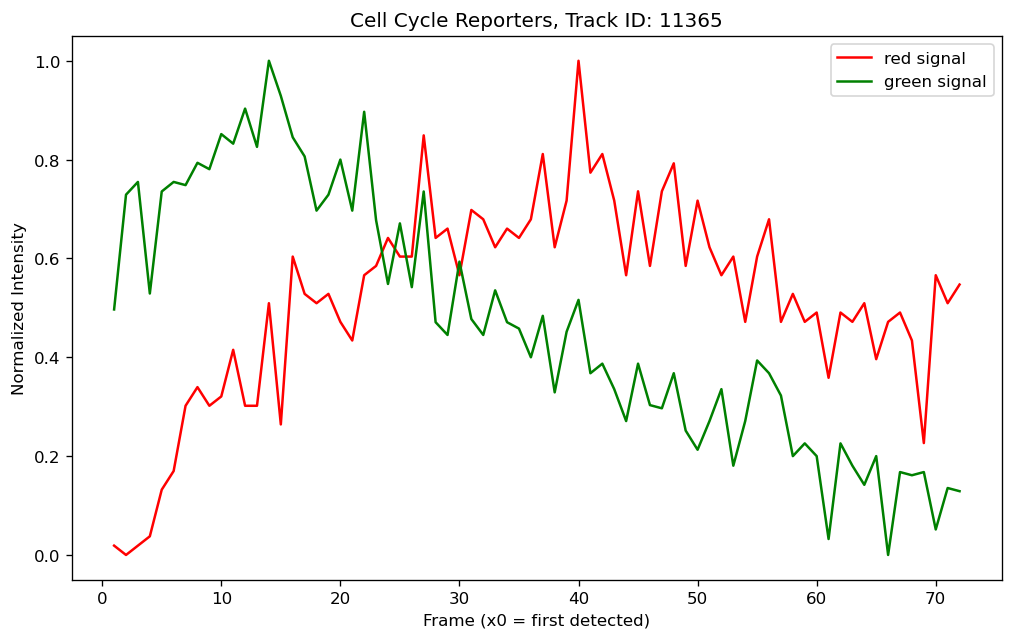

In [91]:
rand_track = np.random.choice(lt['TRACK_ID'])

tmp = lt[lt['TRACK_ID'] == rand_track]

sns.lineplot(data=tmp,
            x='STEP',
            y='MEAN_INTENSITY03', 
            c='red',
            label='red signal')

sns.lineplot(data=tmp,
            x='STEP',
            y='MEAN_INTENSITY01', 
            label='green signal',
            c='green')

plt.title(f'Cell Cycle Reporters, Track ID: {rand_track}')
plt.xlabel('Frame (x0 = first detected)')
plt.ylabel('Normalized Intensity')

Text(0.5, 0.98, 'PIP-FUCCI Signal by Position: Track ID: 1763')

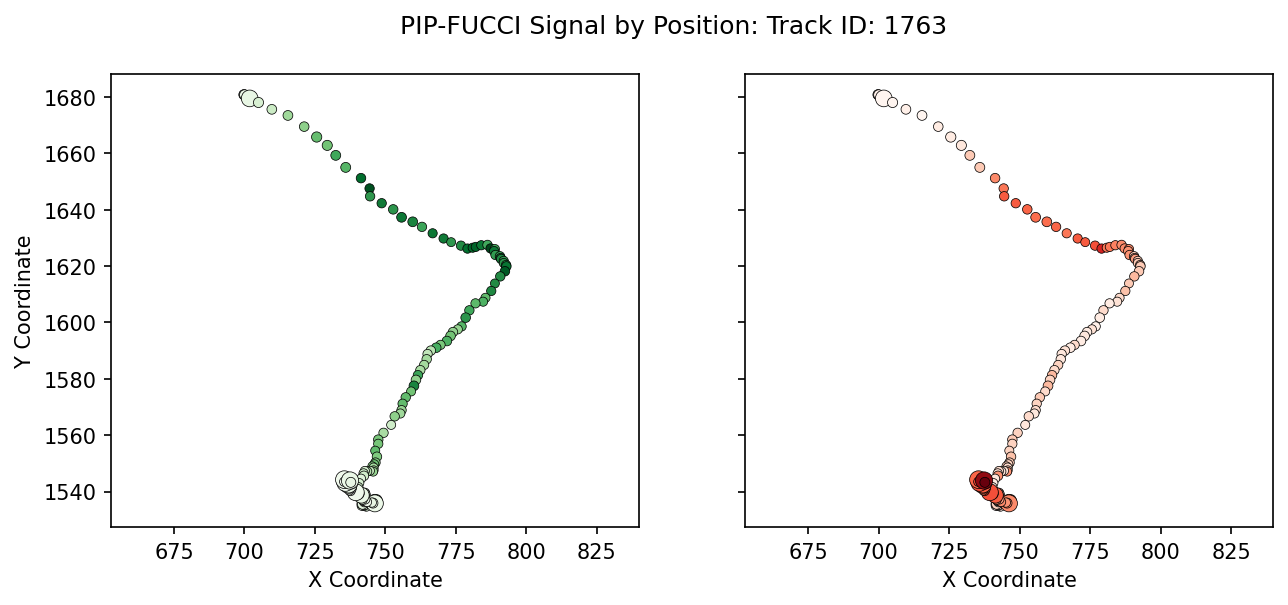

In [13]:
# super_long = lt[lt['TRACK_DURATION'] > 100]
rand_track = np.random.choice(lt['TRACK_ID'])


tmp = lt[lt['TRACK_ID'] == rand_track]

matplotlib.rcParams['figure.figsize'] = (10, 4)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True )


sns.scatterplot(data=tmp,
                x='POSITION_X',
                y='POSITION_Y',
                hue='MEAN_INTENSITY01',
                size='ESTIMATED_DIAMETER',
                palette='Greens', ax=ax1,
                edgecolor='black')



sns.scatterplot(data=tmp,
                x='POSITION_X',
                y='POSITION_Y',
                hue='MEAN_INTENSITY03',
                size='ESTIMATED_DIAMETER',
                palette='Reds', ax=ax2,
                edgecolor='black')



ax1.get_legend().remove()
ax2.get_legend().remove()

ax1.set_ylabel("Y Coordinate")
ax1.set_xlabel("X Coordinate")
ax2.set_xlabel("X Coordinate")

ax1.set(adjustable='datalim', aspect='equal')
ax2.set(adjustable='datalim', aspect='equal')

plt.suptitle(f"PIP-FUCCI Signal by Position: Track ID: {rand_track}")

Text(0.5, 1.0, 'Cell Cycle Reporters for Long Tracks (>24hrs)')

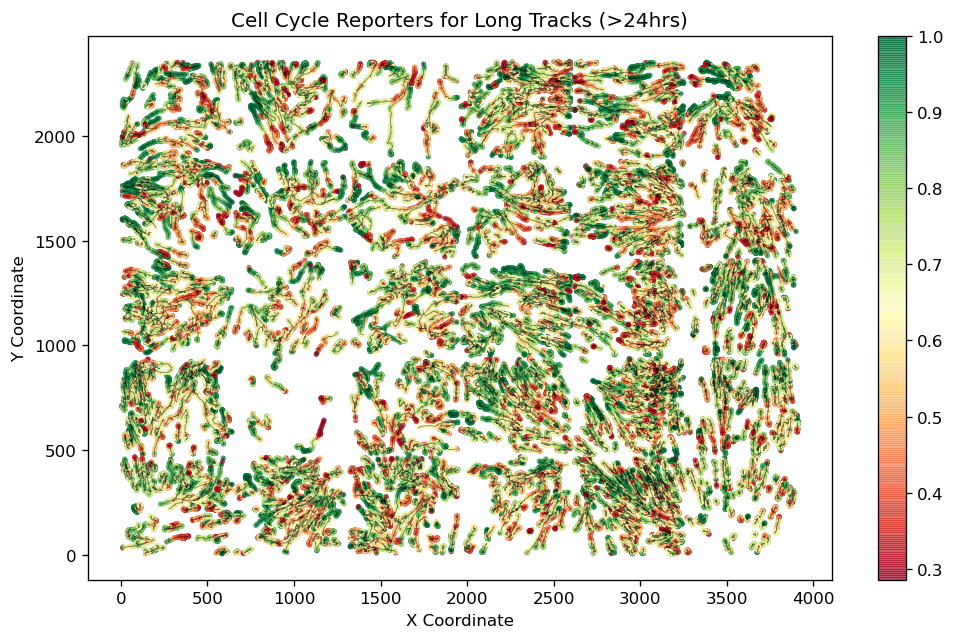

In [15]:
lt['GREEN_PROP'] = lt['MEAN_INTENSITY01'] / (lt['MEAN_INTENSITY01'] + lt['MEAN_INTENSITY03'])


matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.dpi'] = 120

plt.clf()

for track in lt['TRACK_ID'].unique():
    
    tmp = lt[lt['TRACK_ID'] == track]
    
    plt.plot(tmp['POSITION_X'], 
             tmp['POSITION_Y'], 
             lw=0.5,
             alpha=0.5,
             c='black')
    
    sc = plt.scatter(tmp['POSITION_X'], 
                     tmp['POSITION_Y'], 
                     c=tmp['GREEN_PROP'], 
                     s=10,
                     edgecolor='none', 
                     cmap='RdYlGn',
                     alpha=0.7)
plt.colorbar(sc)
plt.ylabel("Y Coordinate")
plt.xlabel("X Coordinate")
plt.title("Cell Cycle Reporters for Long Tracks (>24hrs)")

Text(0.5, 0.98, 'PIP-FUCCI Signal by Position: Track ID: 1906')

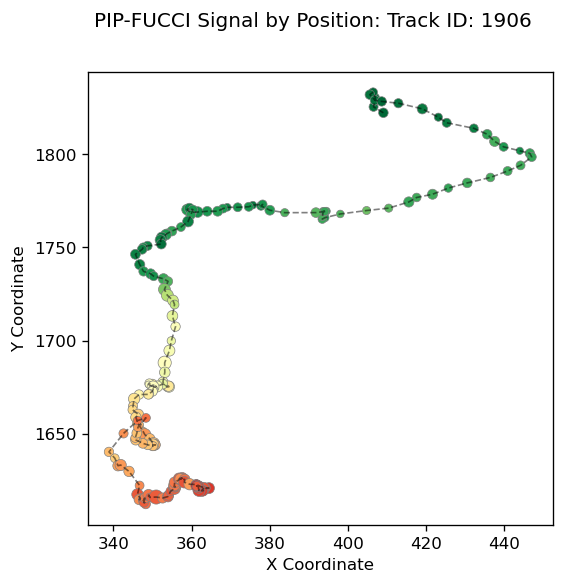

In [16]:
rand_track = np.random.choice(lt['TRACK_ID'])


tmp = lt[lt['TRACK_ID'] == 1906]

matplotlib.rcParams['figure.figsize'] = (5, 5)

sc = sns.scatterplot(data=tmp,
                     x='POSITION_X', 
                     y='POSITION_Y', 
                     c=tmp['GREEN_PROP'], 
                     size='ESTIMATED_DIAMETER',
                     edgecolor='grey', 
                     cmap='RdYlGn')

plt.plot(tmp['POSITION_X'], 
         tmp['POSITION_Y'], 
         lw=1,
         ls="--",
         alpha=0.5,
         c='black')

plt.legend('',frameon=False)


plt.ylabel("Y Coordinate")
plt.xlabel("X Coordinate")

plt.suptitle(f"PIP-FUCCI Signal by Position: Track ID: 1906")

Text(0, 0.5, 'Count of Cells')

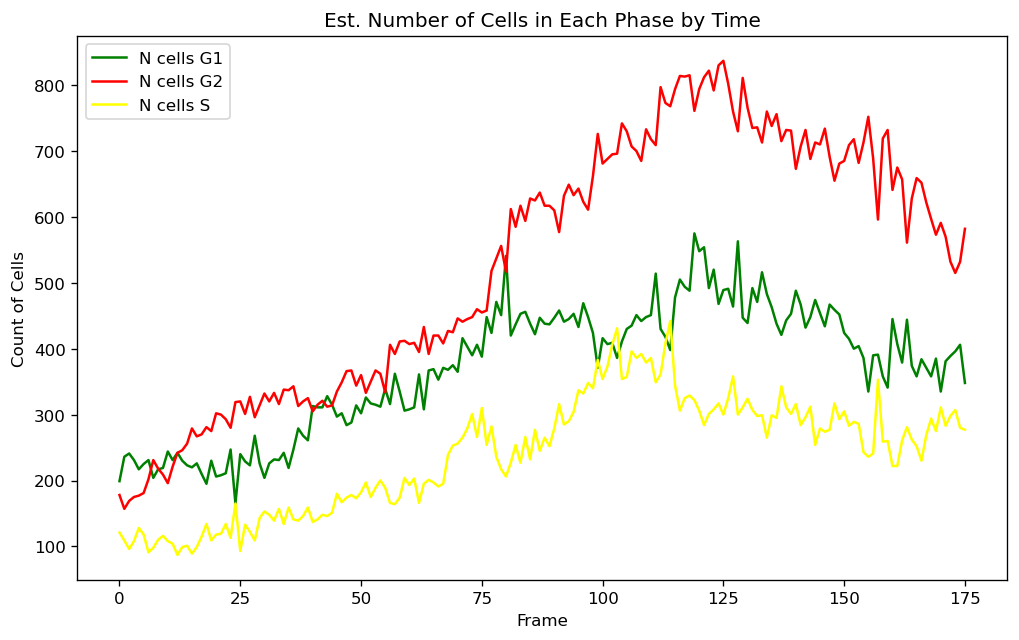

In [17]:
lt['G1'] = np.where(lt['GREEN_PROP'] >= 0.67, 1, 0)
lt['G2'] = np.where((lt['GREEN_PROP'] < 0.67) & (lt['GREEN_PROP'] > 0.33), 1, 0)
lt['S'] = np.where(lt['GREEN_PROP'] < 0.33, 1, 0)


state_by_time = lt[['FRAME', 'G1', 'S', 'G2']].groupby('FRAME', as_index=False).sum()

matplotlib.rcParams['figure.figsize'] = (10, 6)
sns.lineplot(data=state_by_time,
             x='FRAME',
             y='G1',
             color='green',
             label='N cells G1')

sns.lineplot(data=state_by_time,
             x='FRAME',
             y='G2',
             color='red',
             label='N cells G2')

sns.lineplot(data=state_by_time,
             x='FRAME',
             y='S',
             color='yellow',
             label='N cells S')


plt.title(f'Est. Number of Cells in Each Phase by Time')
plt.xlabel('Frame')
plt.ylabel('Count of Cells')


In [47]:


lt['PREV_POSITION_X'] = lt['POSITION_X'].shift(fill_value=np.NaN)
lt['PREV_POSITION_Y'] = lt['POSITION_Y'].shift(fill_value=np.NaN)


def get_dist(row):
    """A function to return distplacement between frames """
    
    x1 = row['POSITION_X']
    y1 = row['POSITION_Y']
    x2 = row['PREV_POSITION_X']
    y2 = row['PREV_POSITION_Y']
    
    if not np.isnan(x2) and not np.isnan(y2):
        point1 = np.array((x1, y1))
        point2 = np.array((x2, y2))
        dist = np.linalg.norm(point1 - point2)
    else:
        dist = 0
        
    return dist
        
        
lt['PARTICLE_DISPLACEMENT'] = lt.apply(lambda x: get_dist(x), axis=1)
lt['PARTICLE_DISPLACEMENT']= np.where(lt['STEP'] == 0, 0, lt['PARTICLE_DISPLACEMENT'])

lt[['TRACK_ID', 'FRAME', 'PARTICLE_DISPLACEMENT']].head(5)

,TRACK_ID,FRAME,PARTICLE_DISPLACEMENT
5,5,0,0.000000
3222,5,1,3.546438
4874,5,2,1.723725
8727,5,3,4.297519
10898,5,4,3.200337


In [50]:
lt['STATE'] = np.where(lt['G1'] == 1, 'G1', 'S')
lt['STATE'] = np.where(lt['G2'] == 1, 'G2', lt['STATE'])

lt['STATE'].value_counts()

G2    92886
G1    65147
S     42468
Name: STATE, dtype: int64

In [55]:
lt['PARTICLE_DISPLACEMENT'].max()

4003.436538156313

Text(0, 0.5, 'Density')

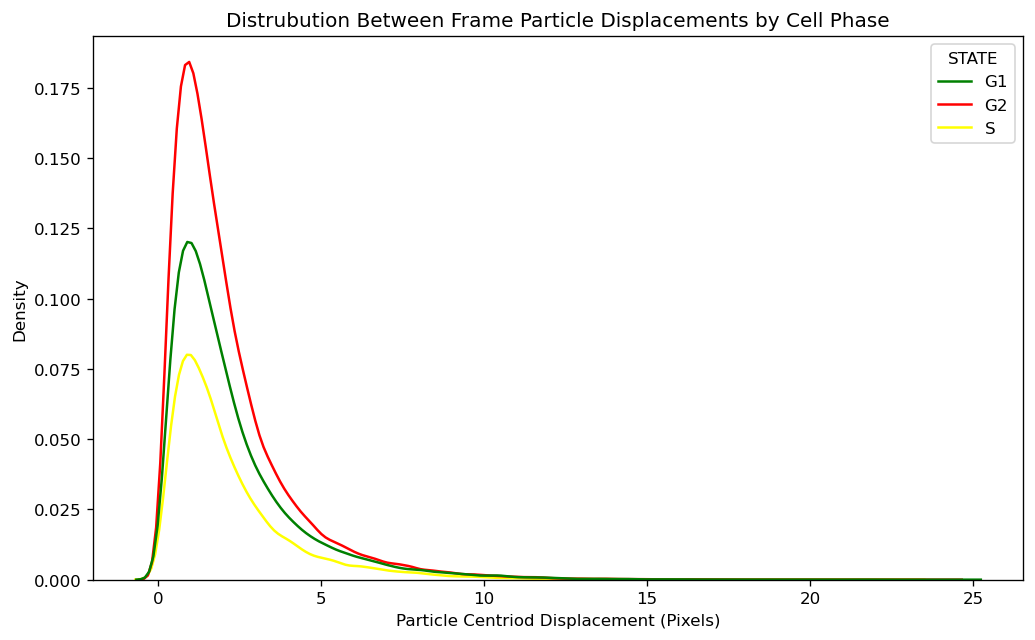

In [64]:

tmp = lt[lt['PARTICLE_DISPLACEMENT'] < 25]

sns.kdeplot(data=tmp, 
           x='PARTICLE_DISPLACEMENT', 
           hue='STATE',
           palette=['green', 'red', 'yellow'])


plt.title('Distrubution Between Frame Particle Displacements by Cell Phase')
plt.xlabel('Particle Centriod Displacement (Pixels)')
plt.ylabel('Density')

In [53]:
lt[['STATE', 'PARTICLE_DISPLACEMENT']].head()

,STATE,PARTICLE_DISPLACEMENT
5,G1,0.000000
3222,G2,3.546438
4874,G2,1.723725
8727,G2,4.297519
10898,G1,3.200337
